# DATA 602 FINAL PROJECT
## Abstract
> This project aims to investigate whether either developed or developing countries are meeting their electricity demand by generation statistically equal amounts of electricity. Our dataset is sourced from the “Our World in Data” kaggle page, covering countries from the 1900 - 2022 and their energy economies. Our focus for this project will be on the last 30 years (1990 - 2020). We also used hypothesis test and t-tests at alpha 0.05 to compare the mean values of electricity demand between developed and developing nations. Our results showed that there was a significant difference in electricity demand between the two groups, with developed nations having higher values for electricity demand. The results of this project provide insights into the state of electricity demand in developed and developing countries. The findings suggest that improving the economy in developing countries may lead to an increase in electricity demand. The results also highlight the importance of investing in renewable energy sources to meet the increasing demand for electricity in both developing and developed countries. The findings have important implications for policymakers, energy companies,and investors, as they provide a better understanding of the factors that affect electricity demand.

## Research Question
> Are countries generating enough electricity to meet its demand regardless if that country is considered “developed” or “developing?

## Data Collection
> World Energy Consumption, [Visit Kaggle](https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption)
> Humand Development Index Table, [Visit Site](https://www.theglobaleconomy.com/rankings/human_development/)

## Data Classification
> Countries in the dataset will be classified as:
>* "Developed" : HDI $\geq$ 0.8 & gdp_per_capita $\geq$ $18,750
>* "Developing" : Otherwise


## Libraries

In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import plotly.express as px
import country_converter as coc
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Loading Data
In the following code cells:
* read in the data from "Our World in Data"'s github repo
* websrape the human development index value for each country


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv')

In [4]:
df.describe()

,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,21890.000000,1.802900e+04,1.111300e+04,862.000000,1337.000000,952.000000,1372.000000,5221.000000,5442.000000,5407.000000,...,6871.000000,5442.000000,2295.000000,5340.000000,5445.000000,7789.000000,8676.000000,4779.000000,6871.000000,5445.000000
mean,1973.661261,1.045117e+08,3.585114e+11,34.143052,3.449835,159.620382,47.051201,65.366646,11.032376,2.030252,...,0.580494,0.129717,274.509119,5.647746,40.340626,54.478592,14.571141,175.599518,1.358409,0.440739
std,34.960962,4.593929e+08,2.411179e+12,227.488193,11.674255,269.540042,125.445899,202.092082,46.728412,5.391375,...,2.009426,0.475138,6084.992396,31.723429,224.719509,236.096397,86.388161,623.300059,4.443910,1.533429
min,1900.000000,1.833000e+03,1.642060e+08,-100.000000,-54.584000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,-42.829000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1945.000000,1.691561e+06,1.365898e+10,0.013250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.665000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1984.000000,6.968070e+06,4.167411e+10,8.251000,0.005000,18.697000,2.704500,0.137000,0.010000,0.067000,...,0.000000,0.000000,20.944000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2003.000000,2.538869e+07,1.744295e+11,25.328000,2.153000,238.256000,25.975500,36.301000,0.740000,1.610000,...,0.062000,0.004000,50.000000,0.105250,0.774000,0.715000,0.059000,13.208500,0.325500,0.053000
max,2022.000000,7.909295e+09,1.136302e+14,5659.328000,136.261000,1747.467000,1139.921000,2524.931000,666.280000,71.429000,...,40.000000,5.999000,242384.844000,679.413000,4872.095000,3219.852000,1848.260000,7361.917000,56.840000,24.614000


### Load Webscraped Data

In [5]:
url = "https://www.theglobaleconomy.com/rankings/human_development/"
page = requests.get(url)

# Webscrape
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find("table", attrs={"id": "benchmarkTable"})
hdi_table = pd.read_html(str(table))[0].drop('Available data', axis=1)

hdi_table.columns = ["country", "hdi_2021", "hdi_rank_2021"]

In [6]:
hdi_table.head()

,country,hdi_2021,hdi_rank_2021
0,Switzerland,0.962,1
1,Norway,0.961,2
2,Iceland,0.959,3
3,Hong Kong,0.952,4
4,Australia,0.951,5


## Data Wrangling

* Merged world energy consumption and Human Developemnt Index Data by country
* Added columns: gdp_per_capita, economic status: developed or developing
* Added column continent via iso_code
* Reordered dataframe columns

In [7]:
hdi_table['country'] = hdi_table['country'].replace(['USA', 'R. of Congo', 'UK', 'UAE'],
                                                    ['United States', 'Congo', 'United Kingdom', 'United Arab Emirates'])

In [8]:
# Merge the two DataFrames
merged_df = pd.merge(df, hdi_table, on='country')

In [9]:
# Add gdp_per_capita and status columns
merged_df['gdp_per_capita'] = round(merged_df['gdp'] / merged_df['population'], 2)
merged_df['status'] = ['developed' if x >= 18750 and y >= 0.8 else 'developing' for x, y in zip(merged_df['gdp_per_capita'],
                                                                                                merged_df['hdi_2021'])]

In [10]:
#
# Convert the entire 'iso_code' column to the 'continent' column
merged_df['continent'] = coc.convert(names=merged_df['iso_code'].tolist(), to='continent', src='ISO3')

In [11]:

columns_order = ['country', 'year', 'iso_code', 'continent', 'status', 'population', 'hdi_rank_2021', 'hdi_2021', 'gdp','gdp_per_capita'] + [col for col in merged_df.columns if col not in ['country', 'year', 'iso_code', 'continent','status', 'population', 'hdi_rank_2021', 'hdi_2021', 'gdp', 'gdp_per_capita']]
merged_df = merged_df[columns_order]

In [12]:

developed_df = merged_df[merged_df['status'] == 'developed'].dropna(subset=['electricity_demand', 'electricity_generation'])

developing_df = merged_df[merged_df['status'] == 'developing'].dropna(subset=['electricity_demand', 'electricity_generation'])

demand_clean_developed = developed_df['electricity_demand']
generation_clean_developed = developed_df['electricity_generation']
demand_clean_developing = developing_df['electricity_demand']
generation_clean_developing = developing_df['electricity_generation']

In [13]:

continent_plot = merged_df.groupby(['year', 'continent']).agg({'electricity_generation': 'sum'}).reset_index().rename(columns={'electricity_generation': 'total_electricity_generation'})

continent_plot = continent_plot.dropna()

continent_plot = continent_plot[(continent_plot['year'] != 2022) & (continent_plot['year'] >= 2000)]


## Analysis and Visualization

In [14]:
continent_plot = px.line(continent_plot,
                         x='year',
                         y='total_electricity_generation',
                         color='continent',
                         title='Total Electrictity Generated by Continent (2000 - 2020)',
                         labels={'year': 'Year', 'total_electricity_generation': 'Electricity (in Terrawatt-Hours)'},
                         markers=True)

continent_plot.update_xaxes(tickmode='array', tickvals=list(range(2000, 2022, 2)))
continent_plot.update_yaxes(tickmode='array', tickvals=list(range(0, 15001, 1000)))

continent_plot.update_layout(template='plotly_white')

continent_plot.show()

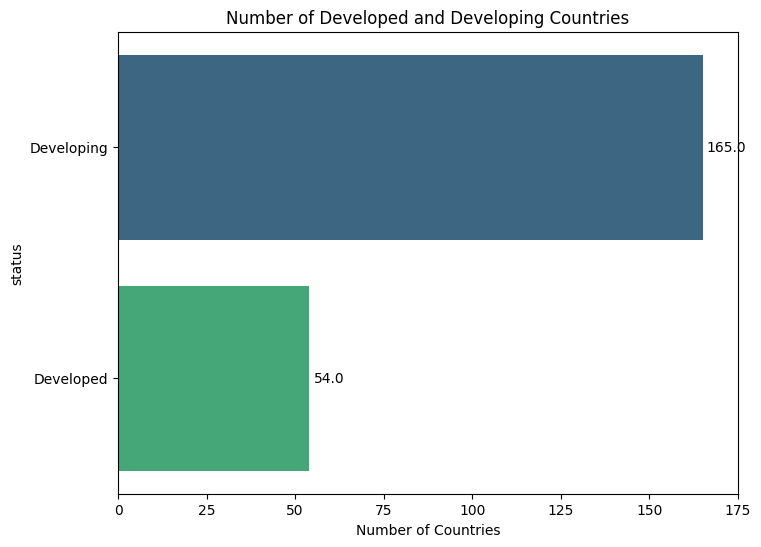

In [15]:
count_df = merged_df.groupby(['country', 'status']).size().reset_index(name='n').drop(columns='n')

plt.figure(figsize=(8, 6))
bar_p = sns.countplot(data=count_df, y='status', palette='viridis')
plt.title('Number of Developed and Developing Countries')
plt.xlabel('Number of Countries')
plt.yticks(ticks=[0, 1], labels=['Developing', 'Developed'])
plt.xticks(ticks=list(range(0, 176, 25)))

for p in bar_p.patches:
    bar_p.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                   ha='left', va='center', xytext=(3, 0), textcoords='offset points')

plt.show()

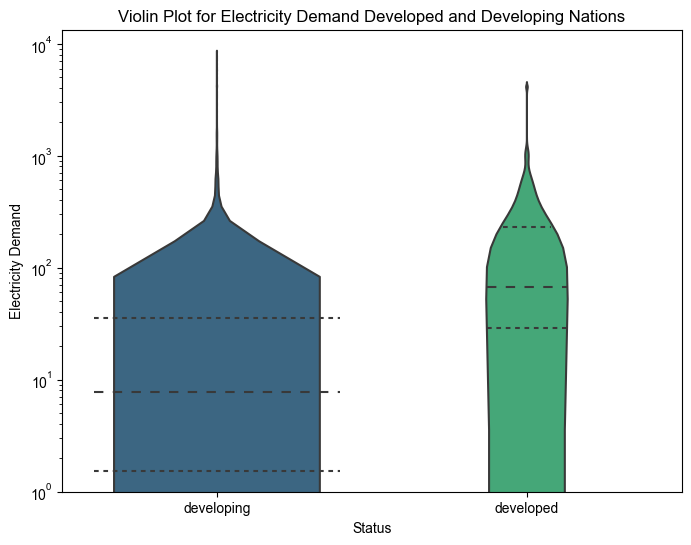

In [17]:

plt.figure(figsize=(8, 6))
violin_plot = sns.violinplot(data=merged_df, x='status', y='electricity_demand', scale='count', inner='quartile', palette='viridis')


plt.xlabel('Status')
plt.ylabel('Electricity Demand')
plt.yscale('log')
plt.title('Violin Plot for Electricity Demand Developed and Developing Nations')

sns.set_style('whitegrid')

plt.show()

### Hypothesis Testing

* $h_0$ = means of demand and generation are equal
* $h_1$ = means of demand and generation are not equal
* $\alpha$ = 0.05

### t test for developed countries

In [18]:
# Perform the t-test
t_statistic, p_value = stats.ttest_ind(a = demand_clean_developed,
                                       b= generation_clean_developed,
                                       equal_var=False)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 0.0166030861055511
P-value: 0.986754938737981


In [19]:
t_statistic_developing, p_value_developing = stats.ttest_ind(a = demand_clean_developing,
                                                             b = generation_clean_developing,
                                                             equal_var=False)
print(f'T-statistic: {t_statistic_developing}')
print(f'P-value: {p_value_developing}')

T-statistic: -0.004223632694763255
P-value: 0.9966301786493077


c:\Users\Nick Climaco\Documents\DATA-602-NC\pyfiles\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



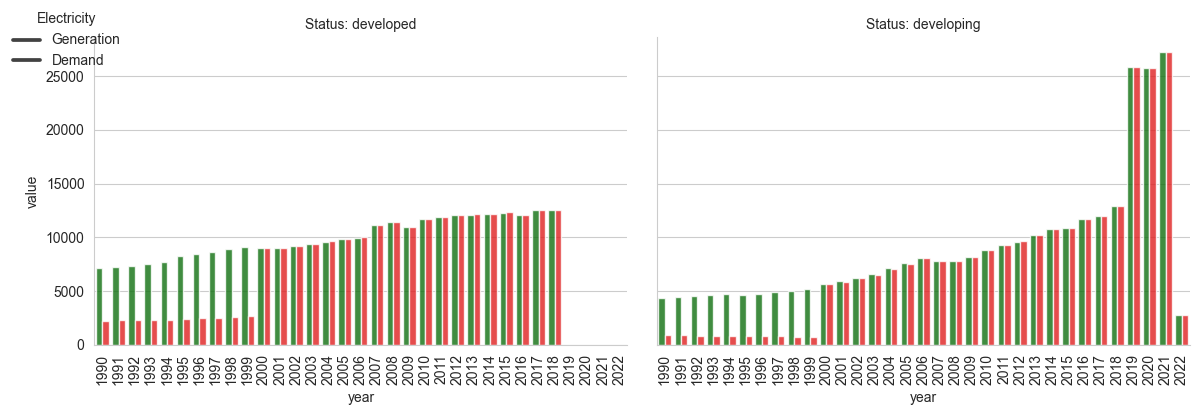

In [20]:
total_electricity = merged_df.groupby(['year', 'status'])[['electricity_generation',
                                                           'electricity_demand']].sum().reset_index()
total_electricity = total_electricity[total_electricity['year'] >= 1990]
total_electricity_melted = total_electricity.melt(id_vars=['year', 'status'],
                                                  value_vars=['electricity_generation','electricity_demand'],
                                                  var_name='type',
                                                  value_name='value')

sorted_years = sorted(total_electricity_melted['year'].unique())

g = sns.FacetGrid(total_electricity_melted, col='status', height=4, aspect=1.5)

g.map_dataframe(sns.barplot, x='year', y='value', hue='type',
                palette=['green', 'red'], alpha=0.8,
                hue_order=['electricity_generation', 'electricity_demand'],
                order=sorted_years)

g.set_titles("Status: {col_name}")
g.add_legend(title="Electricity", labels=['Generation', 'Demand'], loc='upper left')

g.set_xticklabels(rotation=90)

plt.show()

# Regression

In [21]:
X = generation_clean_developed
y = demand_clean_developed

X = X.values.reshape(-1,1)
print(X.shape, y.shape)

(989, 1) (989,)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [23]:
reg = LinearRegression()

reg.fit(X,y)
predictions = reg.predict(X)

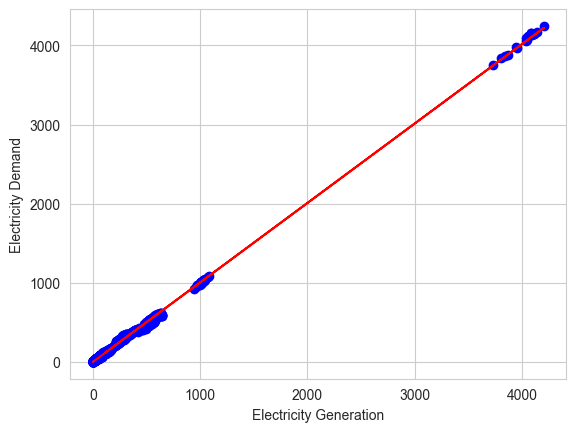

In [24]:
plt.scatter(X,y, color = 'blue')
plt.xlabel("Electricity Generation")
plt.ylabel("Electricity Demand")
plt.plot(X, predictions, color = 'red')

plt.show()

# Conclusion
In this project
* analyzed electricity demand and generation for the two groups of countries
* explored data visualization techniques including violinplot, lineplot, and barplot; and packages such as seaborn, matplotlib and plotly
* used t test to explore the relationship between different variables and draw inferences from the data

Ultimately, we found that electricity demand and generation, regardless of a country's economic status, are statistically equal. This indicates that countries are currently able to meet their electricity demands. However, this also implies that the electricity supply systems are operating with minimal room for error. Consequently, any unforeseen disruptions, such as natural disasters, infrastructure failures, or geopolitical events, could lead to shortages and power blackouts. As developing countries continue to grow economically, their electricity demand is likely to increase. Policymakers and utility companies should anticipate this growth and invest in infrastructure and generation capacity to meet the growing demand. Moreover, while our findings indicate that countries are meeting their electricity demands on average, there may still be disparities in access to electricity within countries. Policymakers should consider strategies to improve energy access for all citizens, particularly in rural and remote areas.